In [1]:
import re
from collections import OrderedDict
from pathlib import Path

import matplotlib.pyplot as plt
import sklearn.decomposition
import torch
from natsort import natsorted
from sklearn.preprocessing import StandardScaler

from fltk.client import Client
from fltk.util.base_config import BareConfig

In [2]:
def load_gradients(grad_paths):
    directories = []
    for path in grad_paths:
        try:
            directories.append(torch.load(str(path)))
        except:
            print(path)
    return torch.stack(directories)

In [3]:


def apply_standard_scaler(gradients):
    scaler = StandardScaler()

    return scaler.fit_transform(gradients)

In [4]:
directories = directories.squeeze(-1)
print(directories.shape, len(poisoned), len(directories))


NameError: name 'directories' is not defined

In [5]:

test = directories[:, 551078:552358].view(1300, 1280)
fitter = sklearn.decomposition.PCA(n_components=2)

scaled_param_diff = apply_standard_scaler(test)
dim_reduced_gradients = fitter.fit_transform(scaled_param_diff)
for indx in range(1300):
    plt.scatter(dim_reduced_gradients[indx, 0], dim_reduced_gradients[indx, 1], color='r' if poisoned[indx] else 'b')
plt.show()

NameError: name 'directories' is not defined

In [4]:
def plot_dataset(directories, poisoned):
    f, axes = plt.subplot(1, 3, 1, share=True, sharey=True)
    for col, indx in enumerate([0, 4, 6]):
        test = directories[:, 551078:552358].view(1300, 10, 128)[:, indx]
        fitter = sklearn.decomposition.PCA(n_components=2)

        scaled_param_diff = apply_standard_scaler(test)
        dim_reduced_gradients = fitter.fit_transform(scaled_param_diff)
        for indx in range(1300):
            axes[col].scatter(dim_reduced_gradients[indx, 0], dim_reduced_gradients[indx, 1],
                              color='r' if poisoned[indx] else 'b')
        plt.show()

In [7]:
sharex, shareyimport
torch
import torch.nn as nn
import torch.nn.functional as F


class Cifar10CNN(nn.Module):

    def __init__(self):
        super(Cifar10CNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(kernel_size=2)

        self.conv5 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(128)
        self.conv6 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn6 = nn.BatchNorm2d(128)
        self.pool3 = nn.MaxPool2d(kernel_size=2)

        self.fc1 = nn.Linear(128 * 4 * 4, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.bn1(F.relu(self.conv1(x)))
        x = self.bn2(F.relu(self.conv2(x)))
        x = self.pool1(x)

        x = self.bn3(F.relu(self.conv3(x)))
        x = self.bn4(F.relu(self.conv4(x)))
        x = self.pool2(x)

        x = self.bn5(F.relu(self.conv5(x)))
        x = self.bn6(F.relu(self.conv6(x)))
        x = self.pool3(x)

        x = x.view(-1, 128 * 4 * 4)

        x = self.fc1(x)
        x = F.softmax(self.fc2(x))

        return x


def flatten_params(parameters):
    """
    flattens all parameters into a single column vector. Returns the dictionary to recover them
    :param: parameters: a generator or list of all the parameters
    :return: a dictionary: {"params": [#params, 1],
    "indices": [(start index, end index) for each param] **Note end index in uninclusive**

    """
    l = [torch.flatten(p) for p in parameters.values()]
    indices = []
    s = 0
    for p in l:
        size = p.shape[0]
        indices.append((s, s + size))
        s += size
    flat = torch.cat(l).view(-1, 1)
    return {"params": flat, "indices": indices}


def recover_flattened(flat_params, indices, model):
    """
    Gives a list of recovered parameters from their flattened form
    :param flat_params: [#params, 1]
    :param indices: a list detaling the start and end index of each param [(start, end) for param]
    :param model: the model that gives the params with correct shapes
    :return: the params, reshaped to the ones in the model, with the same order as those in the model
    """
    l = [flat_params[s:e] for (s, e) in indices]
    orderedDict = OrderedDict()
    keys = list(model.state_dict().keys())
    for i, p in enumerate(model.state_dict().values()):
        try:
            l[i] = torch.Tensor(l[i]).view(*p.shape)
            orderedDict[keys[i]] = l[i]
        except:
            print('fail')
            pass
    return l, orderedDict

In [8]:
import numpy as np

model = Cifar10CNN()
default_model_path = f"../default_models/Cifar10CNN.model"
model.load_state_dict(torch.load(default_model_path))
flattened_default = flatten_params(model.state_dict())



In [65]:
test.shape

torch.Size([552368])

In [9]:
restored = flattened_default['params'].view(-1) + test

In [10]:
recovered_params, state_dict = recover_flattened(restored.unsqueeze(-1), flattened_default['indices'], model)

fail
fail
fail
fail
fail
fail


In [11]:
recovered_model = model.load_state_dict(state_dict)

In [13]:
test_data = Client("test", None, 1, 2, BareConfig())

INFO:root:Welcome to client test


Client test is stopping


In [17]:
test_data.init_dataloader()


DEBUG:root:Instantiated CIFAR10 train data, with pill: None
DEBUG:root:Loading 'distributed' CIFAR10 train data


Files already downloaded and verified


INFO:root:Done with init


Traceback (most recent call last):
  File "/home/jeroen/Documents/CSE/MSc/year/1/Q4/CS4290/repo/fltk-testbed-gr-30/fltk/client.py", line 150, in init_dataloader
    self.dataset = self.args.DistDatasets[self.args.dataset_name](self.args, pill)
  File "/home/jeroen/Documents/CSE/MSc/year/1/Q4/CS4290/repo/fltk-testbed-gr-30/fltk/datasets/distributed/cifar10.py", line 17, in __init__
    self.init_train_dataset()
  File "/home/jeroen/Documents/CSE/MSc/year/1/Q4/CS4290/repo/fltk-testbed-gr-30/fltk/datasets/distributed/cifar10.py", line 36, in init_train_dataset
    self.train_sampler = get_sampler(self.train_dataset, self.args)
  File "/home/jeroen/Documents/CSE/MSc/year/1/Q4/CS4290/repo/fltk-testbed-gr-30/fltk/strategy/data_samplers.py", line 244, in get_sampler
    "Using {} sampler method, with args: {}".format(method, args.get_sampler_args()))
  File "/home/jeroen/Documents/CSE/MSc/year/1/Q4/CS4290/repo/fltk-testbed-gr-30/fltk/util/base_config.py", line 164, in get_sampler_args
    ret

In [19]:
test_data.net = model
test_data.test()

AttributeError: 'NoneType' object has no attribute 'get_test_loader'

In [30]:
# Last fully connected layer, connected to target class
target_class = 5
flattened_default['params'][range(*(flattened_default['indices'][-2]))].view(10, 128)[target_class]

tensor([ 0.0784,  0.0881,  0.0798, -0.0379,  0.0801,  0.0417,  0.0034, -0.0510,
        -0.0166, -0.0446, -0.0645, -0.0369,  0.0494, -0.0604, -0.0321,  0.0512,
         0.0566,  0.0195, -0.0848, -0.0778, -0.0247, -0.0786, -0.0587,  0.0727,
         0.0637,  0.0688,  0.0395, -0.0222,  0.0549,  0.0427, -0.0211,  0.0285,
        -0.0579, -0.0493,  0.0550, -0.0144, -0.0426, -0.0838,  0.0051,  0.0074,
         0.0426,  0.0815,  0.0274,  0.0638, -0.0438, -0.0355, -0.0100, -0.0620,
         0.0215,  0.0475, -0.0516, -0.0041,  0.0599, -0.0819, -0.0853, -0.0008,
        -0.0352, -0.0089,  0.0825, -0.0147,  0.0709, -0.0455,  0.0345, -0.0150,
         0.0276,  0.0691,  0.0683,  0.0294,  0.0435,  0.0406, -0.0534, -0.0046,
         0.0113,  0.0083, -0.0107, -0.0324,  0.0732, -0.0201,  0.0077, -0.0301,
         0.0468, -0.0851, -0.0078, -0.0583,  0.0137,  0.0001, -0.0507,  0.0766,
         0.0161, -0.0227,  0.0079,  0.0530, -0.0514,  0.0597,  0.0764, -0.0182,
        -0.0838, -0.0694,  0.0323, -0.05

In [89]:
flattened_default['indices'][-2]
torch.nn.Linear(128, 10).weight.shape

torch.Size([10, 128])

In [174]:
from sklearn.svm import OneClassSVM
from sklearn.cluster import KMeans

poisoned_class = directories[:, 551078:552358].view(1300, 10, 128)[:, 6]
fitter = sklearn.decomposition.PCA(n_components=2)

scaled_param_diff = apply_standard_scaler(poisoned_class)
dim_reduced_gradients = fitter.fit_transform(scaled_param_diff)

clf = OneClassSVM('poly', degree=10)
clf.fit(dim_reduced_gradients)

np.dot(clf.predict(dim_reduced_gradients), -1 * (poisoned * 2 - 1))

TypeError: list indices must be integers or slices, not tuple

In [2]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X=dim_reduced_gradients, y=poisoned * 2 - 1, clf=clf, legend=2)

DEBUG:matplotlib:matplotlib data path: /home/jeroen/Documents/CSE/MSc/year/1/Q4/CS4290/repo/fltk-testbed-gr-30/venv/lib/python3.9/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/home/jeroen/.config/matplotlib
DEBUG:matplotlib:matplotlib version 3.4.2
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is linux
DEBUG:matplotlib:loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', '_io', 'marshal', 'posix', '_frozen_importlib_external', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', '_signal', 'encodings.latin_1', '_abc', 'abc', 'io', '__main__', '_stat', 'stat', '_collections_abc', 'genericpath', 'posixpath', 'os.path', 'os', '_sitebuiltins', '_locale', '_bootlocale', 'types', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib', 'importlib.machinery', '_heapq', 'heapq', 'itertools', 'keyword', '_operator', 'operator', 'reprlib', '_collect

DEBUG:matplotlib:CACHEDIR=/home/jeroen/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/jeroen/.cache/matplotlib/fontlist-v330.json
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


NameError: name 'dim_reduced_gradients' is not defined

In [127]:
# Models the empty language
regex_0 = re.compile("^$")
regex_1 = re.compile("client[9]")
regex_2 = re.compile("client[92]")
regex_3 = re.compile("client[926]")


def plot_dataset(directories, poisoned, ratio):
    f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharex=True, sharey=True)
    # Shift title to top
    f.suptitle(f"PCA analysis gradients with {ratio} poisoned")
    # Shared X axis label
    ax[1].set_xlabel('PCA dim 1')
    # Shared y axis label
    ax[0].set_ylabel('PCA dim 2')

    # For non-target/source class, source class, target class
    for col, indx in enumerate([0, 4, 6]):
        test = directories[:, 551078:552358].view(1898, 10, 128)[:, indx]
        fitter = sklearn.decomposition.PCA(n_components=2)

        scaled_param_diff = apply_standard_scaler(test)
        dim_reduced_gradients = fitter.fit_transform(scaled_param_diff)

        ax[col].scatter(dim_reduced_gradients[poisoned.T, 0], dim_reduced_gradients[poisoned.T, 1],
                        color='r',
                        marker='x')
        ax[col].scatter(dim_reduced_gradients[poisoned.T == False, 0], dim_reduced_gradients[poisoned.T == False, 1],
                        color='b',
                        marker='o', alpha=0.1)

    ax[0].title.set_text('class 0')
    ax[1].title.set_text('class 4')
    ax[2].title.set_text('class 6')
    plt.savefig(f'{ratio}.pdf')


first_ten_rounds = re.compile("\/([0-9]|10)\/")
for regex, name in [(regex_1, "0.1")]:
    grad_paths = list(Path(f"../charts/extractor/fig8/output_{name}/gradient/").rglob("**/*.pt"))
    grad_paths = [str(path) for path in grad_paths if not any(first_ten_rounds.findall(str(path)))][:-1]
    grad_paths = natsorted(grad_paths)
    poisoned = np.array([any(regex.findall(path)) for path in grad_paths])
    directories = load_gradients(grad_paths)
#     plot_dataset(directories, poisoned, name)

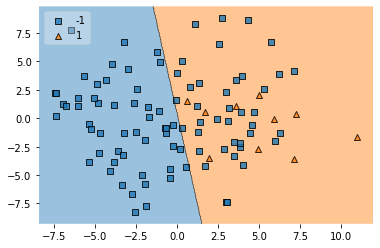

49


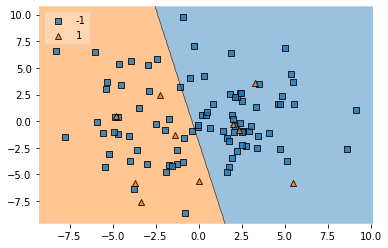

44


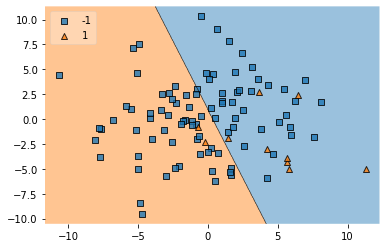

55


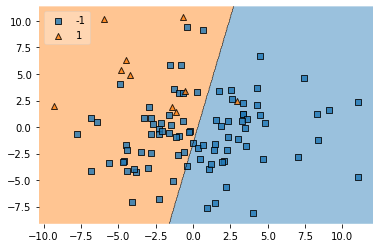

55


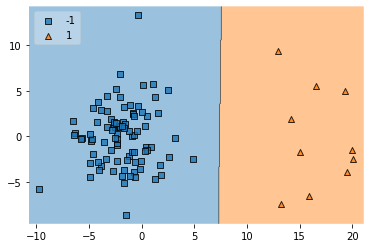

10


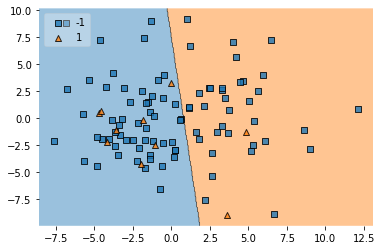

38


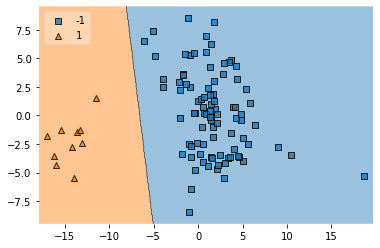

10


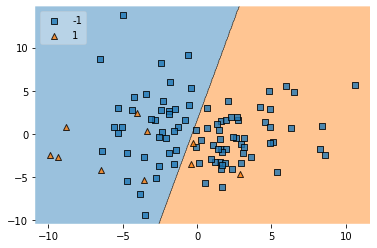

55


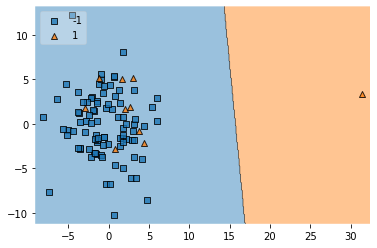

1


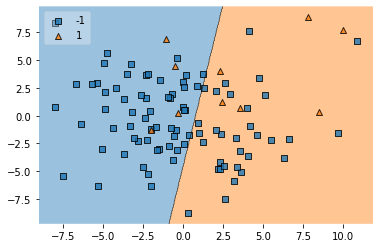

38


In [131]:
till = 100

for x in range(10):
    test = directories[:1199, 551078:552358].view(1199, 10, 128)[:till, x]

    fitter = sklearn.decomposition.PCA(n_components=2)

    scaled_param_diff = apply_standard_scaler(test)
    dim_reduced_gradients = fitter.fit_transform(scaled_param_diff)

    res = dict()
    clf = KMeans(2)
    clf.fit(dim_reduced_gradients)

    plot_decision_regions(X=dim_reduced_gradients, y=poisoned[:till] * 2 - 1, clf=clf, legend=2)
    plt.show()
    print(sum(abs(clf.predict(dim_reduced_gradients))))


In [112]:
from sklearn.metrics import silhouette_score

print(silhouette_score(dim_reduced_gradients, clf.predict(dim_reduced_gradients)))

clf = KMeans(1)
clf.fit(dim_reduced_gradients)

print(silhouette_score(dim_reduced_gradients, clf.predict(dim_reduced_gradients)))

0.33744629551745725


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)